In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes.columns = ['filme_id','titulo','generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
dados = pd.concat([filmes, generos], axis=1)
dados.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [6]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

modelo.labels_

array([1, 1, 2, ..., 2, 1, 2])

In [7]:
print(generos.columns)
modelo.cluster_centers_

#então quanto maior for o número, mais próximo o grupo estará de cada gênero.


Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


array([[-0.05917995,  0.39606877, -0.25283206, -0.22514686, -0.25754724,
        -0.22754231,  2.55545141, -0.19791458,  0.17885506, -0.24085632,
         0.64827437, -0.1717346 , -0.07046974, -0.15267429,  0.38581658,
        -0.25372439, -0.25334807,  0.73518542, -0.16013328, -0.06316711],
       [-0.05917995,  0.87610328,  1.44809223,  1.0823309 ,  0.98159148,
        -0.19190648, -0.34724178, -0.2117121 , -0.5515998 ,  0.90390635,
        -0.08854921, -0.12246392,  0.51747943,  0.13466599, -0.0970096 ,
        -0.27569319,  0.87413156, -0.06531805, -0.05676148, -0.00266276],
       [ 0.02504665, -0.28453305, -0.30722956, -0.22312856, -0.19277281,
         0.08762383, -0.37463158,  0.0871233 ,  0.10219505, -0.17685297,
        -0.09492563,  0.06068384, -0.11336164, -0.00536141, -0.04570334,
         0.11273361, -0.16735708, -0.11620057,  0.04259829,  0.01199918]])

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose()


,0,1,2
(no genres listed),-0.059180,-0.059180,0.025047
Action,0.396069,0.876103,-0.284533
Adventure,-0.252832,1.448092,-0.307230
Animation,-0.225147,1.082331,-0.223129
Children,-0.257547,0.981591,-0.192773
Comedy,-0.227542,-0.191906,0.087624
Crime,2.555451,-0.347242,-0.374632
Documentary,-0.197915,-0.211712,0.087123
Drama,0.178855,-0.551600,0.102195
Fantasy,-0.240856,0.903906,-0.176853


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4396D0E48>,
      dtype=object)

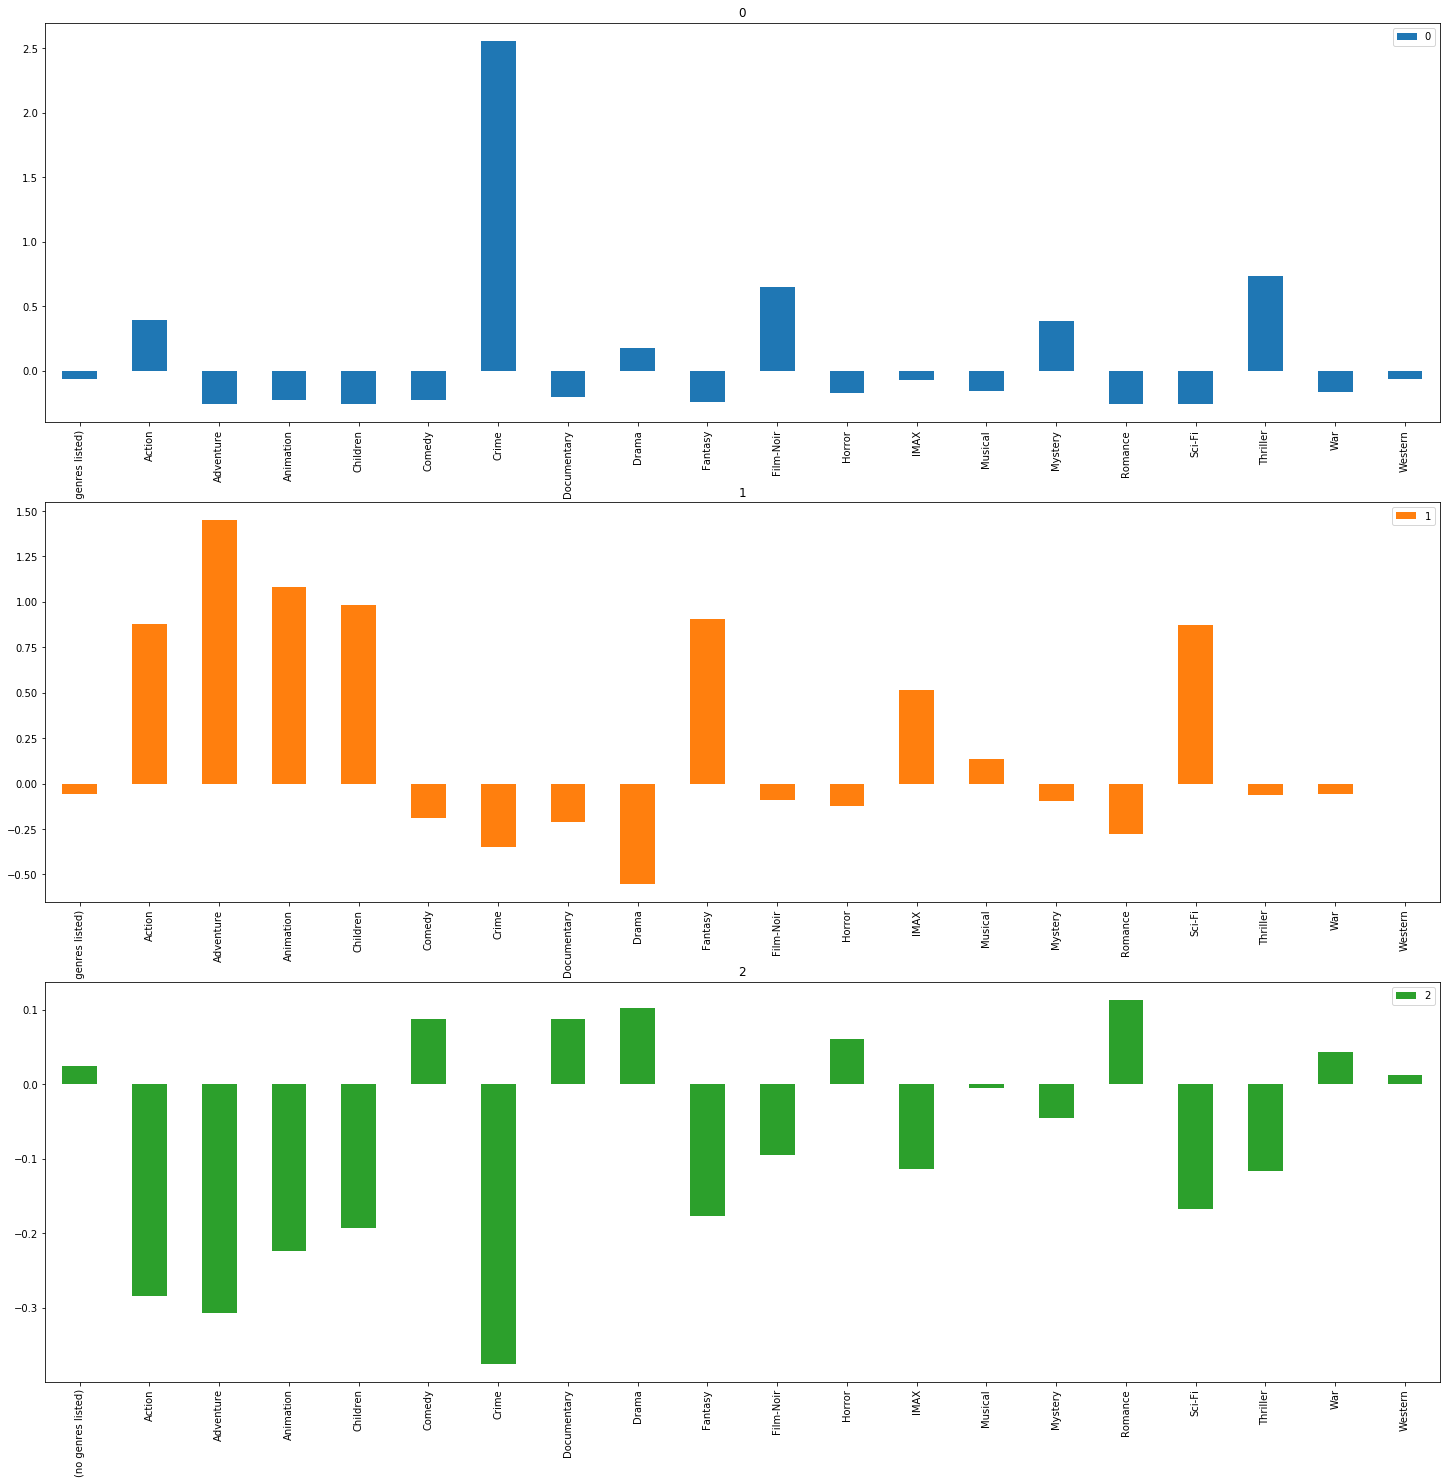

In [9]:
grupos.transpose().plot.bar(subplots=True, figsize = (25,25), sharex=False)


In [10]:
#verificando se os grupos fazem sentido

filtro = modelo.labels_ == 0
dados[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6508,53519,Death Proof (2007),Action|Adventure|Crime|Horror|Thriller,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
7958,96114,Brake (2012),Crime|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3945,5553,Stakeout (1987),Comedy|Crime|Romance|Thriller,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
1630,2176,Rope (1948),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4911,7364,Intermission (2003),Comedy|Crime|Drama,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4575,6796,Boyz N the Hood (1991),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6338,48997,Perfume: The Story of a Murderer (2006),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4019,5680,Auto Focus (2002),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6161,44301,Lights in the Dusk (Laitakaupungin valot) (2006),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4576,6797,Bugsy (1991),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 42.862286 ,  43.50957  ],
       [ 32.94836  ,  -0.74159  ],
       [ -5.477519 , -32.286964 ],
       ...,
       [  9.092593 ,  -5.2455063],
       [ 22.913778 ,  36.668144 ],
       [ -5.4852757,  34.092045 ]], dtype=float32)

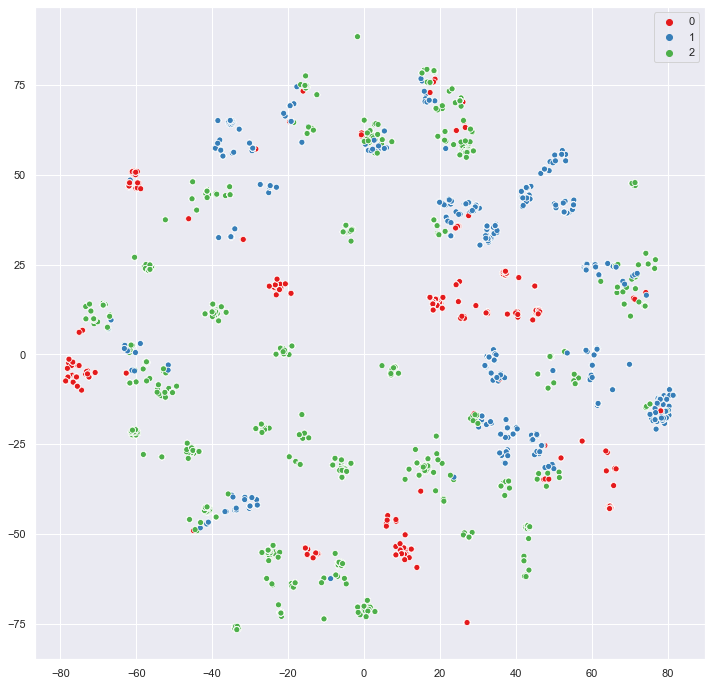

In [12]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12, 12)})
palette = sns.color_palette('Set1', 3)

sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=palette)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B439D96808>,
      dtype=object)

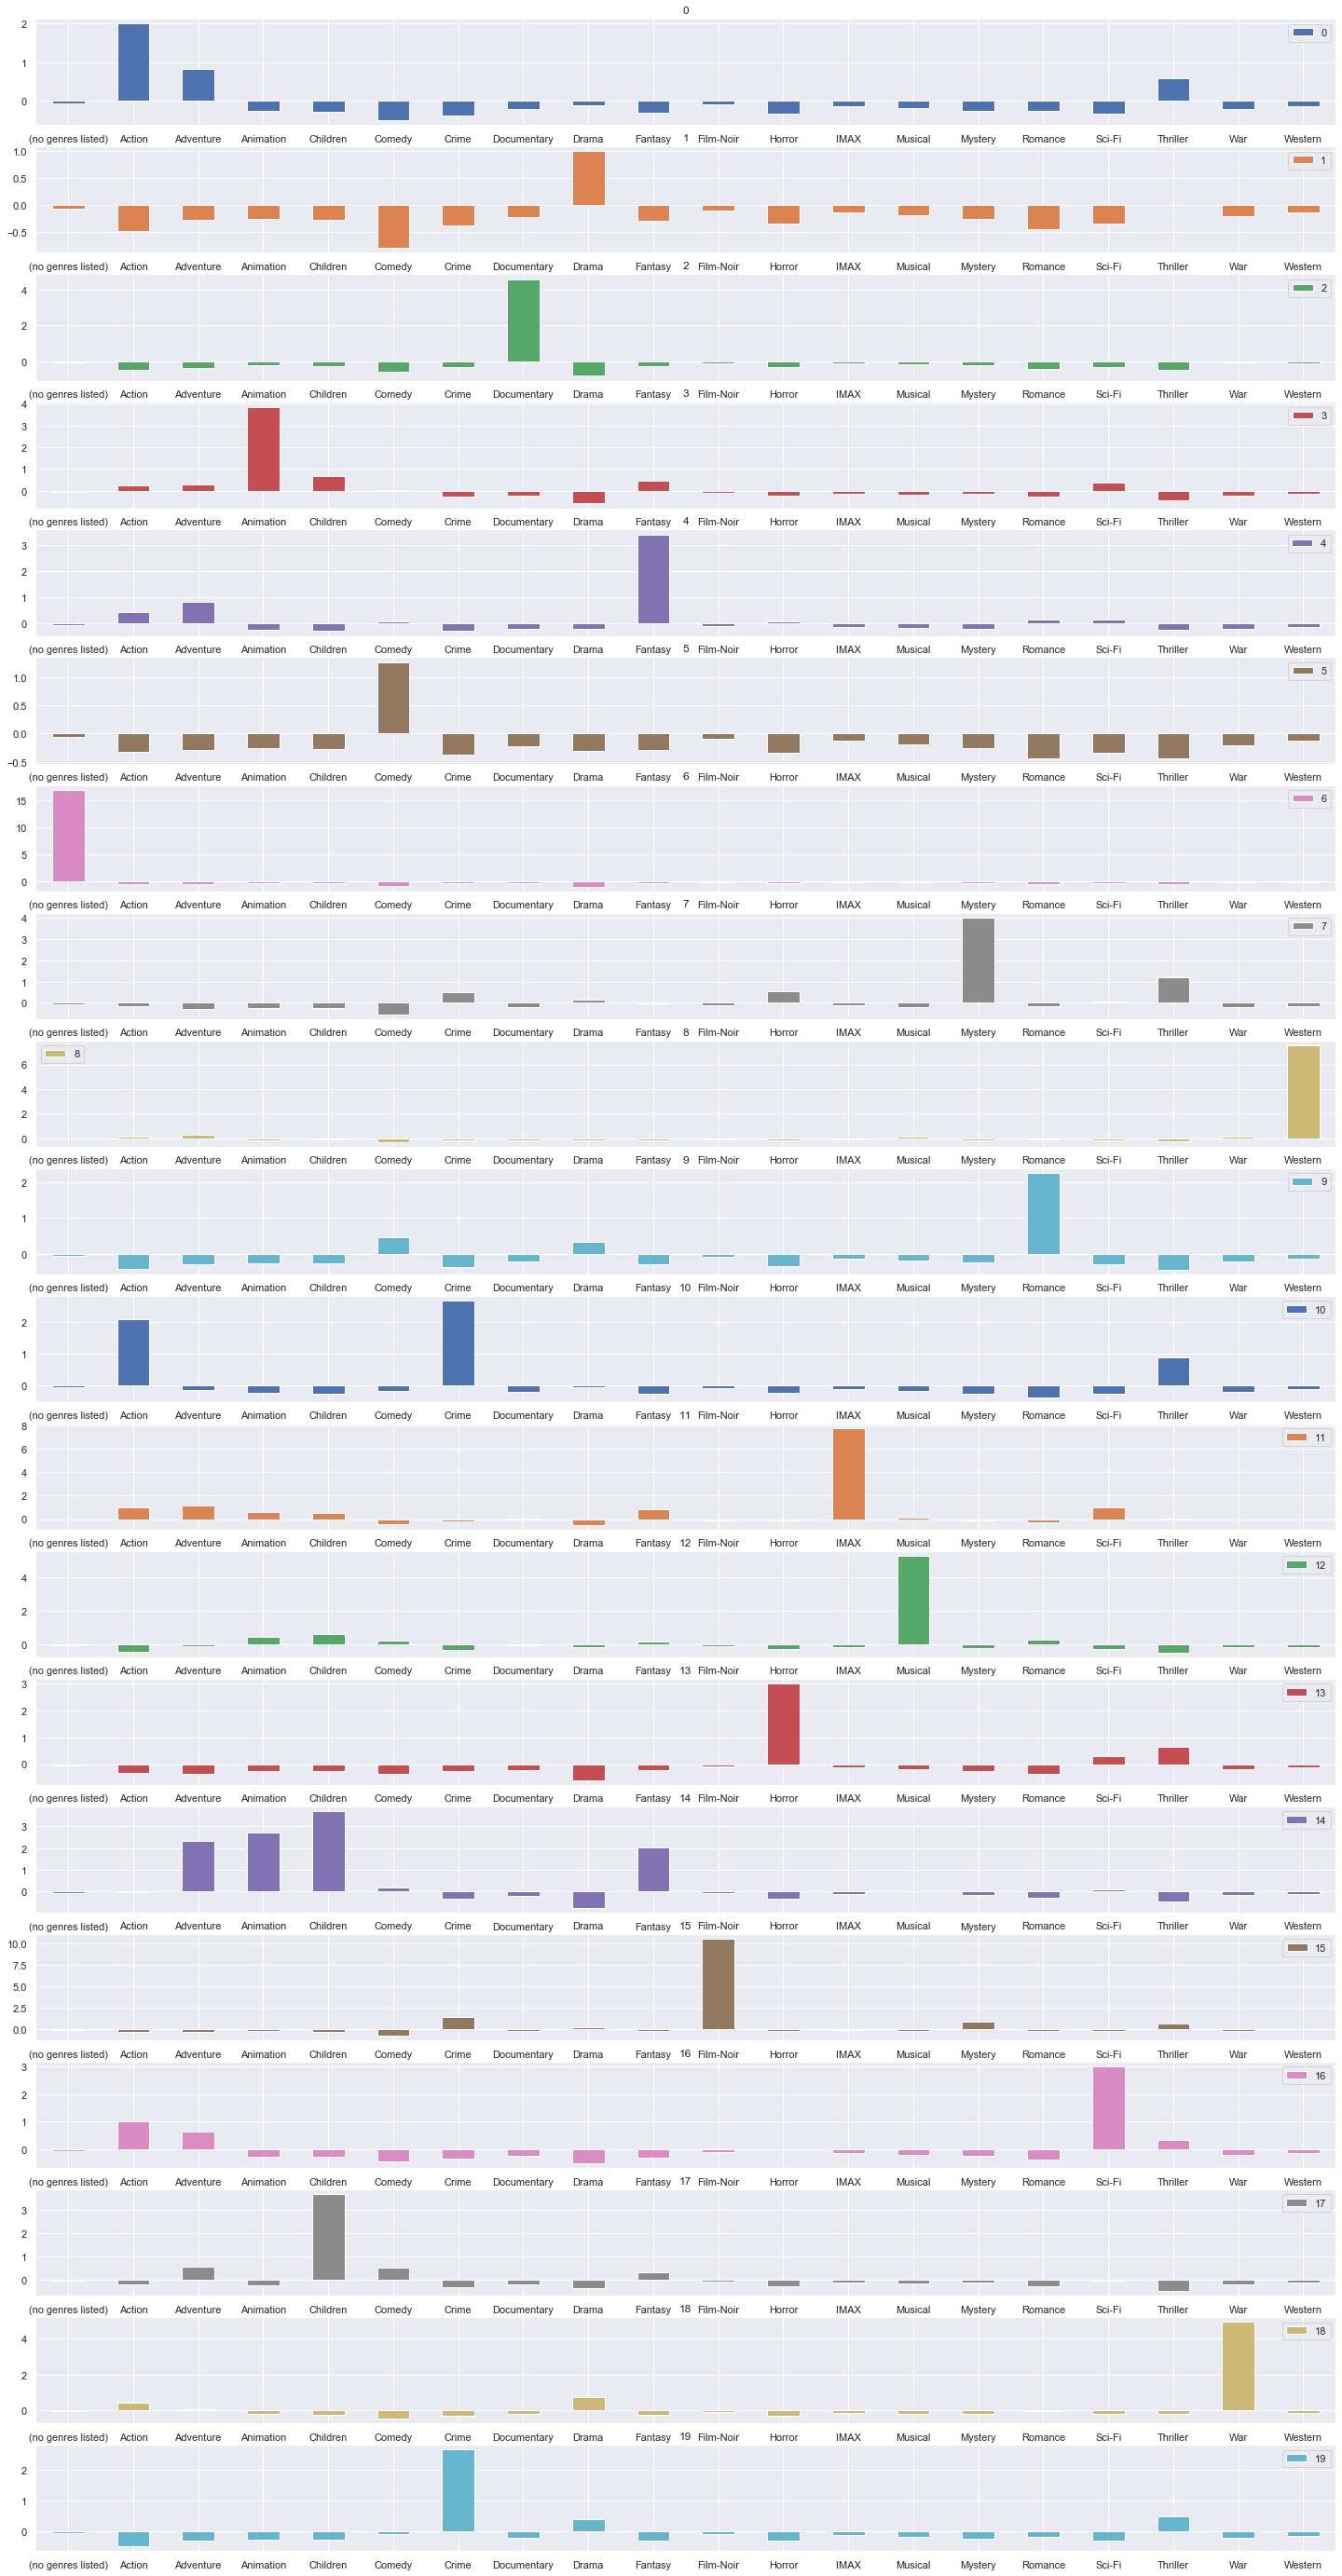

In [13]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)

In [14]:
#testando os filmes p ver se tá tudo ok

filtro = modelo.labels_ == 7
dados[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5773,31364,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
7155,71550,Assassination of a High School President (2008),Comedy|Drama|Mystery,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8651,120637,Blackhat (2015),Action|Crime|Drama|Mystery|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3575,4898,Novocaine (2001),Comedy|Crime|Mystery|Thriller,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
3130,4212,Death on the Nile (1978),Crime|Mystery,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3644,5008,Witness for the Prosecution (1957),Drama|Mystery|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3276,4436,Obsession (1976),Mystery|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6992,67255,"Girl with the Dragon Tattoo, The (Män som hata...",Crime|Drama|Mystery|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1134,1484,"Daytrippers, The (1996)",Comedy|Drama|Mystery|Romance,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3656,5026,"Brotherhood of the Wolf (Pacte des loups, Le) ...",Action|Mystery|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [15]:
#parece que o k-means tá bacana

In [16]:
def kmeans(numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [17]:
kmeans(20, generos_escalados)

#retorna o n de clusters e o Erro Quadrático Médio

[20, 55233.97096337193]

In [18]:
kmeans(3, generos_escalados)

[3, 166152.02375549]

In [19]:
#como consigo saber com quantos grupos eu tenho que ter?

resultado = [kmeans(numero_de_grupos,
                    generos_escalados)
             for numero_de_grupos in range(1, 31)]
resultado

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 166186.9135863858],
 [4, 157114.02304114038],
 [5, 148257.19837833065],
 [6, 137510.82352419407],
 [7, 128777.75531967699],
 [8, 119904.26255854893],
 [9, 108974.16186535385],
 [10, 101593.17568937657],
 [11, 94789.93017518613],
 [12, 88270.59936303845],
 [13, 78850.27951432715],
 [14, 73153.48361323008],
 [15, 67393.90880702542],
 [16, 65616.1605484361],
 [17, 61515.90967002085],
 [18, 59203.983547741045],
 [19, 56706.50790094871],
 [20, 55769.02640891156],
 [21, 53103.0368666706],
 [22, 53123.83498732802],
 [23, 50709.123342324136],
 [24, 49059.5332983047],
 [25, 47955.79201713605],
 [26, 46061.75638344101],
 [27, 46155.71916850456],
 [28, 44766.07870391673],
 [29, 43427.03963583838],
 [30, 43032.05859474002]]

In [20]:
resultados = pd.DataFrame(resultado, columns=['grupos','EQM'])
resultados

,grupos,EQM
0,1,194840.000000
1,2,179664.999079
2,3,166186.913586
3,4,157114.023041
4,5,148257.198378
5,6,137510.823524
6,7,128777.755320
7,8,119904.262559
8,9,108974.161865
9,10,101593.175689


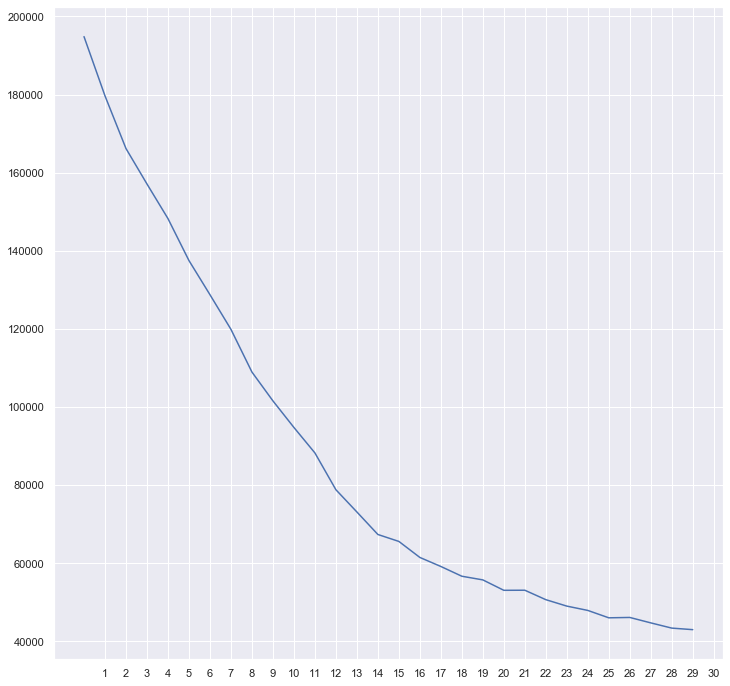

In [21]:
#método do cotovelo (elbow method)

resultados.EQM.plot(xticks = resultados.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B43CB14648>,
      dtype=object)

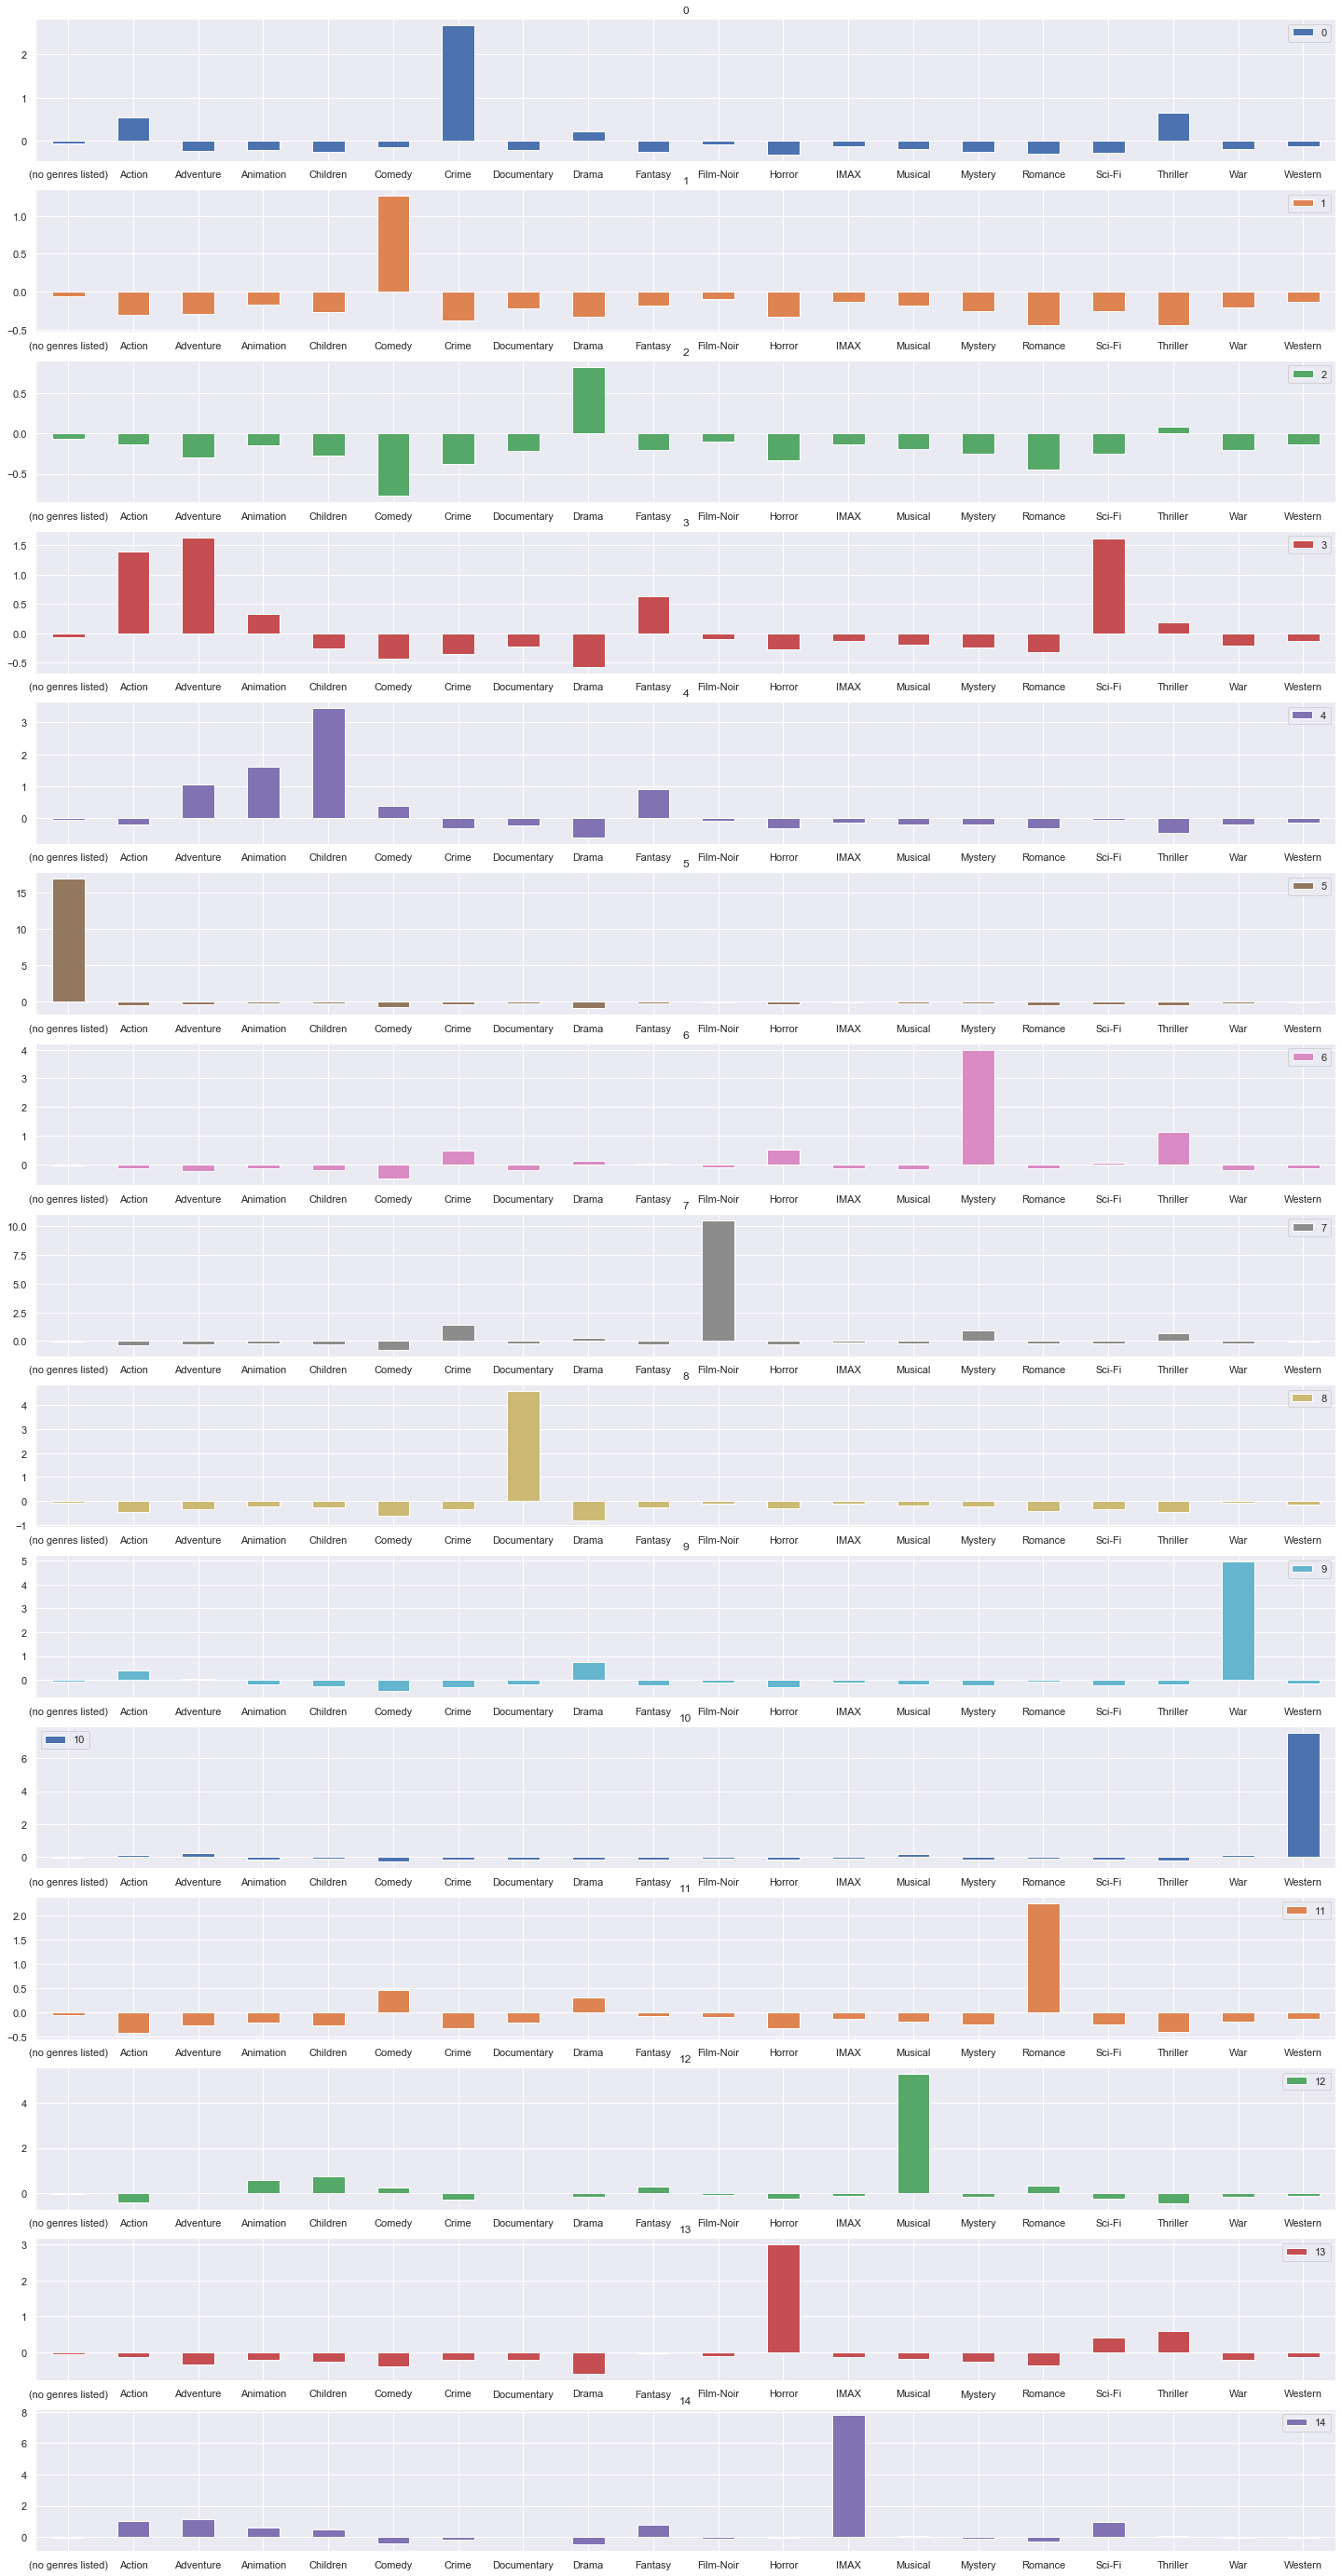

In [22]:
modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)


In [23]:
#testando os filmes p ver se tá tudo ok

filtro = modelo.labels_ == 13
dados[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5112,8137,"Wasp Woman, The (1959)",Horror|Sci-Fi,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4724,7046,"Witches of Eastwick, The (1987)",Comedy|Fantasy|Horror|Thriller,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
465,532,Serial Mom (1994),Comedy|Crime|Horror,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2954,3962,Ghoulies II (1987),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3721,5146,Vampire Hunter D: Bloodlust (Banpaia hantâ D) ...,Animation|Fantasy|Horror|Sci-Fi,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5504,26409,"Clonus Horror, The (1979)",Horror|Sci-Fi,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7933,95633,Spirit Camp (2009),Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7578,86068,Films to Keep You Awake: The Christmas Tale (P...,Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5913,33683,High Tension (Haute tension) (Switchblade Roma...,Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1969,2614,Chopping Mall (a.k.a. Killbots) (1986),Action|Horror|Sci-Fi,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [24]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=15)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5,  0, 13, ...,  2,  5,  2], dtype=int64)

In [25]:
tsne = TSNE()
viz = tsne.fit_transform(generos_escalados)
viz

array([[-17.848131  ,  64.624504  ],
       [ 47.094784  ,  27.778402  ],
       [-14.478392  , -29.711065  ],
       ...,
       [-15.723684  ,  -0.41925752],
       [-33.84269   ,  56.07669   ],
       [ 23.854555  ,   9.38474   ]], dtype=float32)

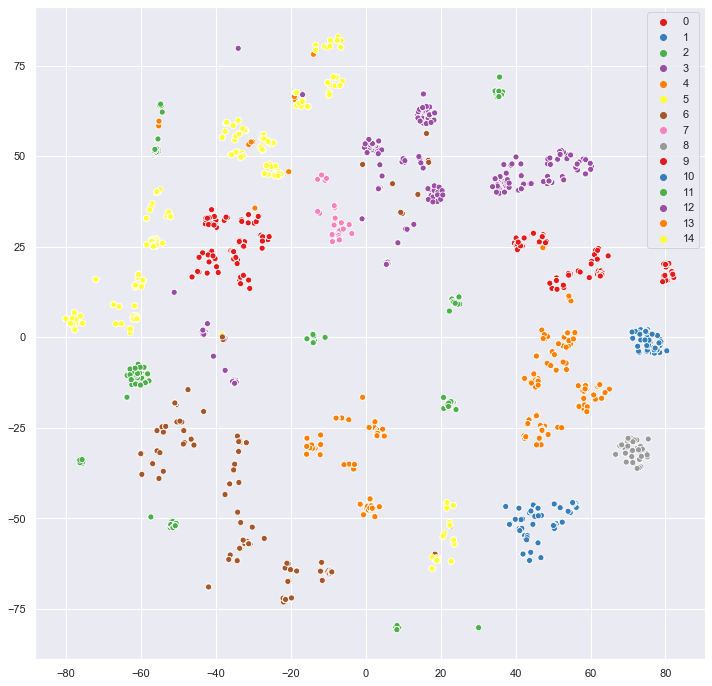

In [26]:
palette = sns.color_palette('Set1', 15)

sns.scatterplot(x=viz[:,0] ,y=viz[:,1],
               hue = grupos, palette=palette)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B43D567608>,
      dtype=object)

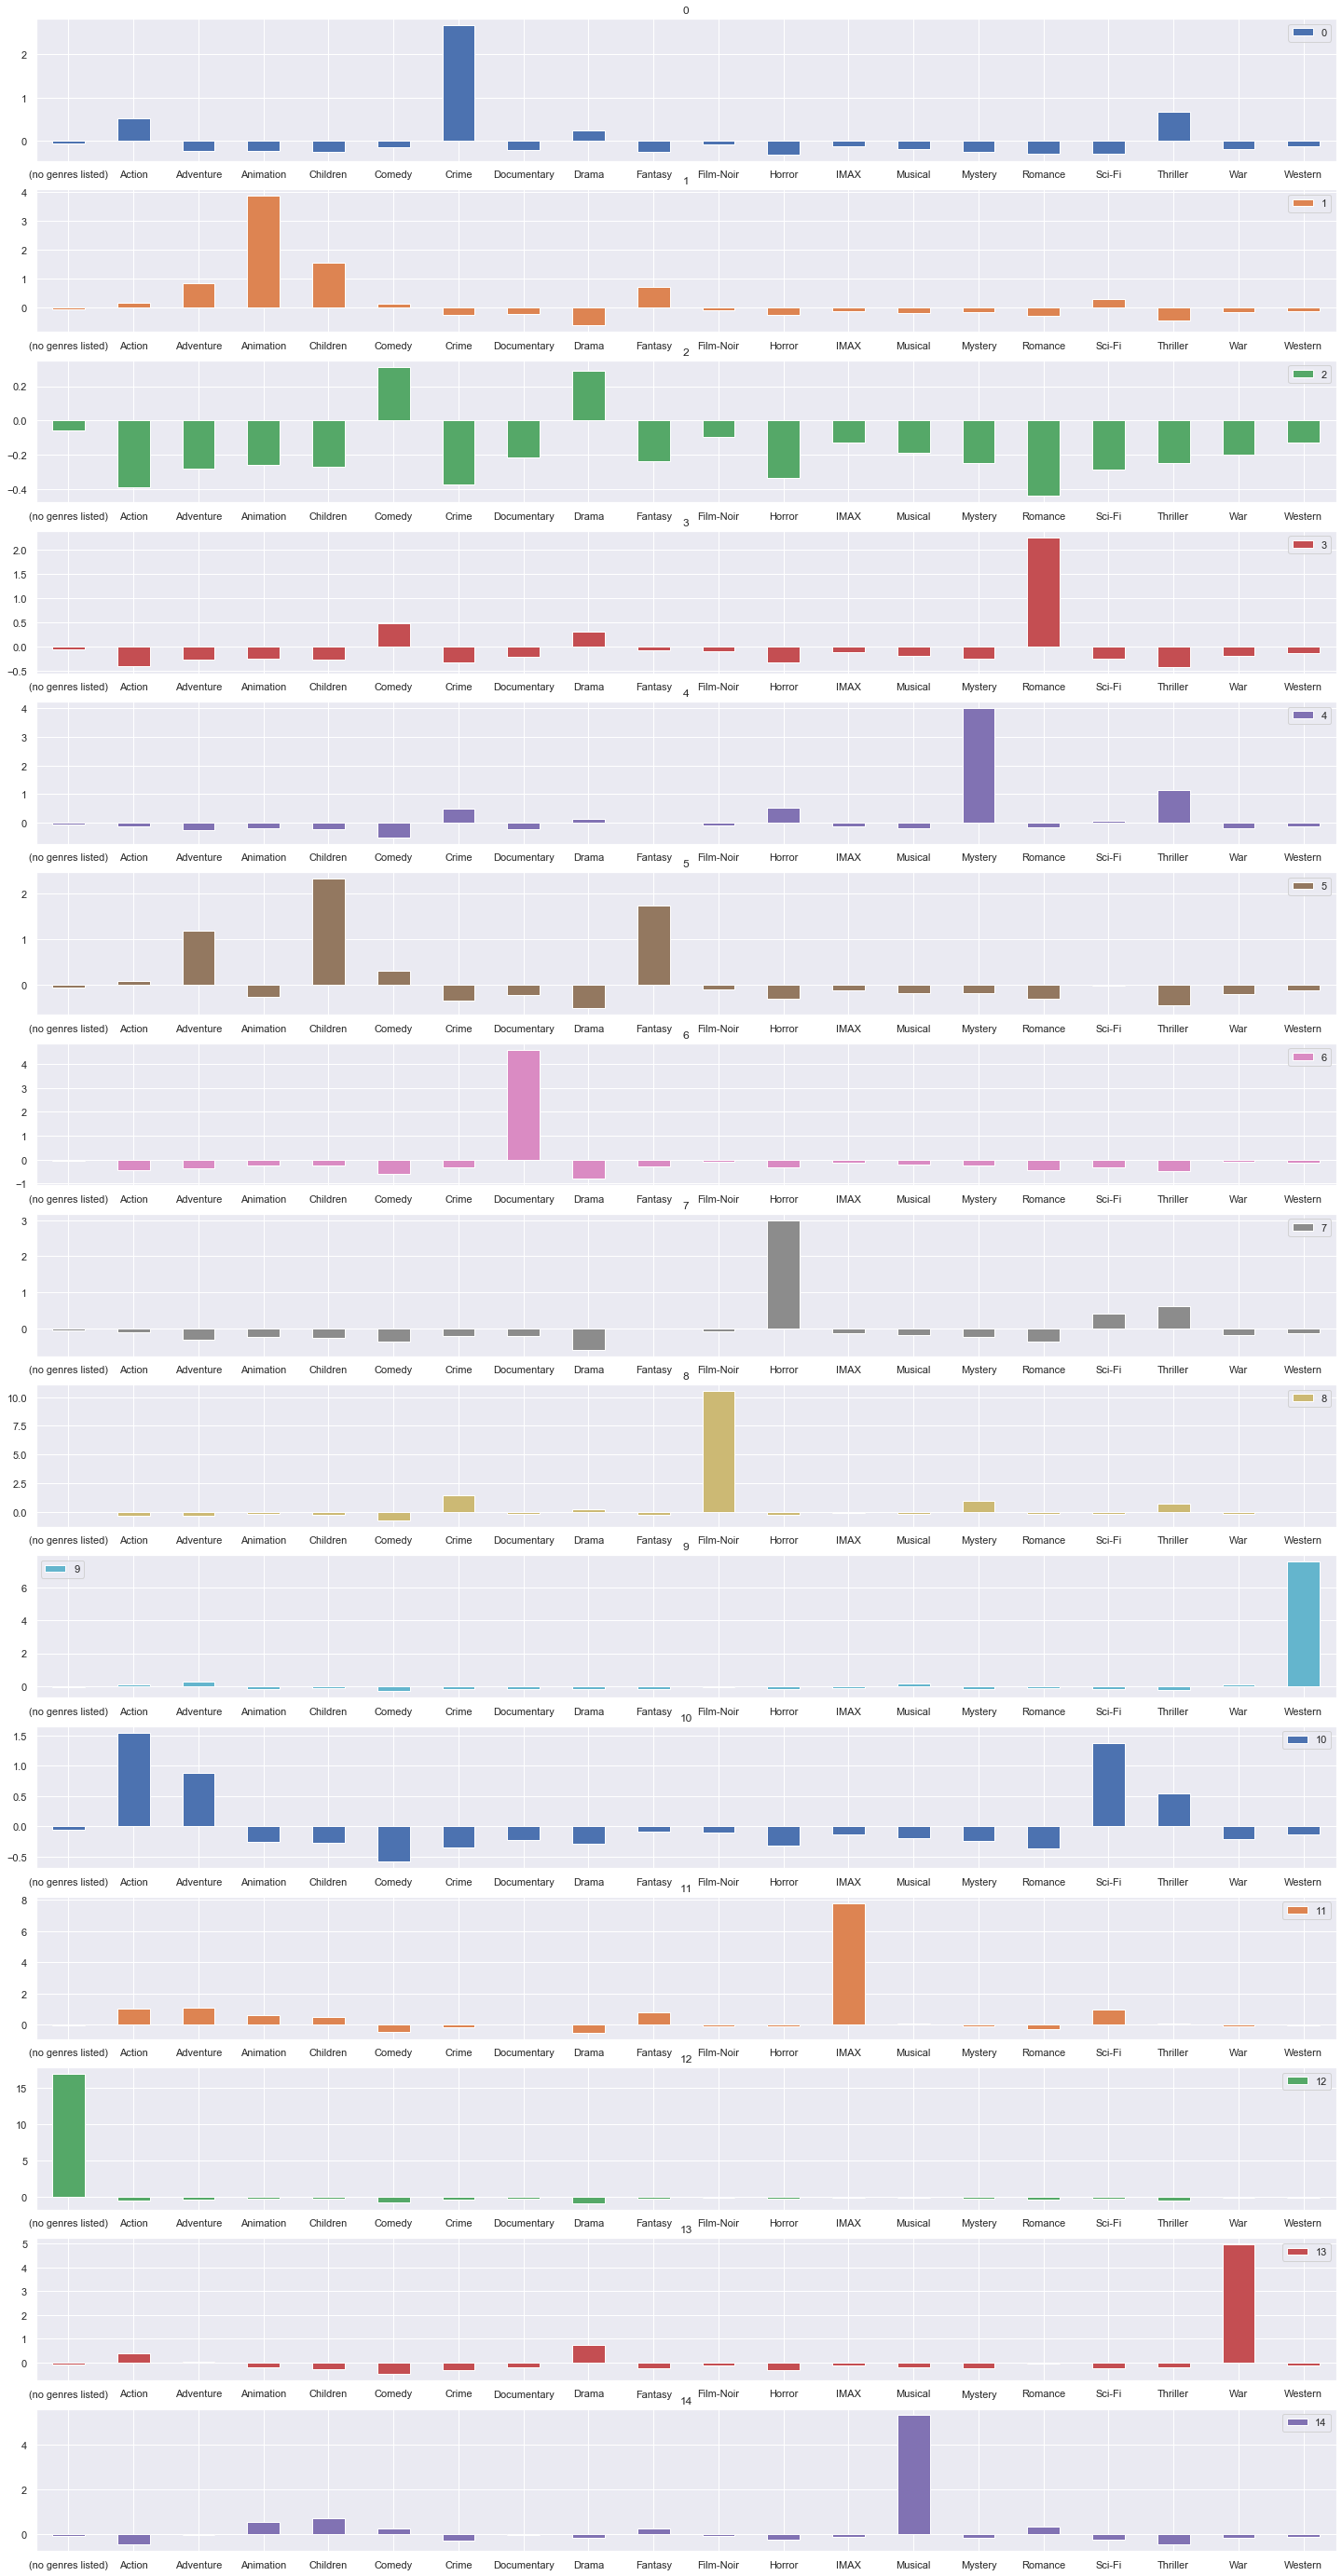

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage 

modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0) 

In [28]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia 

array([[ 2.        ,  3.        ,  2.71733135,  2.        ],
       [10.        , 15.        ,  3.11587643,  3.        ],
       [ 0.        , 16.        ,  3.34162554,  4.        ],
       [ 7.        , 17.        ,  3.70395227,  5.        ],
       [ 5.        , 18.        ,  3.7241166 ,  6.        ],
       [ 1.        , 19.        ,  4.35718387,  7.        ],
       [ 4.        , 20.        ,  4.74725812,  8.        ],
       [ 6.        , 21.        ,  5.03140325,  9.        ],
       [13.        , 22.        ,  5.31633137, 10.        ],
       [14.        , 23.        ,  5.7536275 , 11.        ],
       [ 9.        , 24.        ,  7.80659586, 12.        ],
       [11.        , 25.        ,  8.1164227 , 13.        ],
       [ 8.        , 26.        , 10.816343  , 14.        ],
       [12.        , 27.        , 17.03689465, 15.        ]])

{'icoord': [[135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [95.0, 95.0, 114.375, 114.375],
  [85.0, 85.0, 104.6875, 104.6875],
  [75.0, 75.0, 94.84375, 94.84375],
  [65.0, 65.0, 84.921875, 84.921875],
  [55.0, 55.0, 74.9609375, 74.9609375],
  [45.0, 45.0, 64.98046875, 64.98046875],
  [35.0, 35.0, 54.990234375, 54.990234375],
  [25.0, 25.0, 44.9951171875, 44.9951171875],
  [15.0, 15.0, 34.99755859375, 34.99755859375],
  [5.0, 5.0, 24.998779296875, 24.998779296875]],
 'dcoord': [[0.0, 2.7173313549391334, 2.7173313549391334, 0.0],
  [0.0, 3.115876432890247, 3.115876432890247, 2.7173313549391334],
  [0.0, 3.3416255414535625, 3.3416255414535625, 3.115876432890247],
  [0.0, 3.7039522722263407, 3.7039522722263407, 3.3416255414535625],
  [0.0, 3.7241165986127327, 3.7241165986127327, 3.7039522722263407],
  [0.0, 4.357183870248819, 4.357183870248819, 3.7241165986127327],
  [0.0, 4.747258119185096, 4.74725811918509

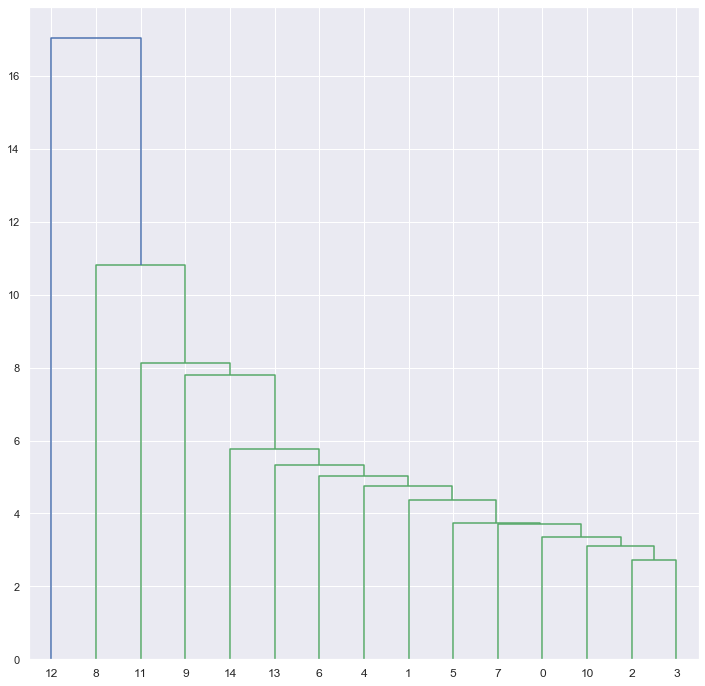

In [29]:
dendrograma = dendrogram(matriz_de_distancia)
dendrograma